# Q-4. 

### Business Understanding:

    In this problem statement we have to build a model which can predict the Revenue and whether the revenue is on the weekend or not, and find the Informational_Duration using an ensemble learning algorithm.

In [5]:
# Importing libraries

# To read data and numeric operations
import pandas as pd

# Graph plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# Sk-learn library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'xgboost'

In [6]:
# Loading dataset

df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Let's Understand the data

### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

**Administrative**: This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration**: This is the amount of time spent in this category of pages.

**Informational**: This is the number of pages of this type (informational) that the user visited.

**Informational_Duration**: This is the amount of time spent in this category of pages.

**ProductRelated**: This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration**: This is the amount of time spent in this category of pages.

**BounceRates**: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates**: The percentage of pageviews on the website that end at that specific page.

**PageValues**: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce

**SpecialDay**: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in

In [7]:
# Dhape of dataframe

df.shape

(12330, 18)

In [8]:
# Columns of the data

df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
# Datatypes of Dataframe

df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# Basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
# Checking the duplicate data

df.duplicated().sum()

125

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['Month', 'VisitorType']


In [15]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']


In [16]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### EDA

**"Administrative"**

<Axes: >

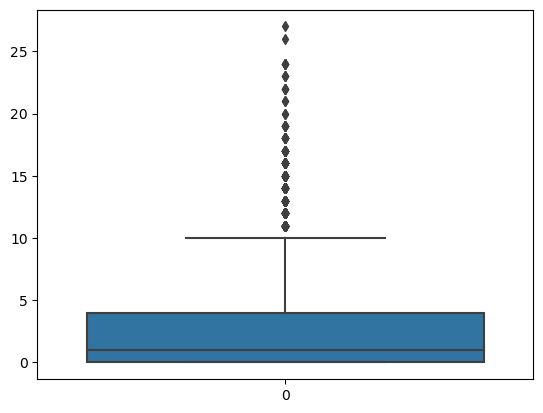

In [17]:
sns.boxplot(df['Administrative'])

Text(0.5, 0, 'Administrative')

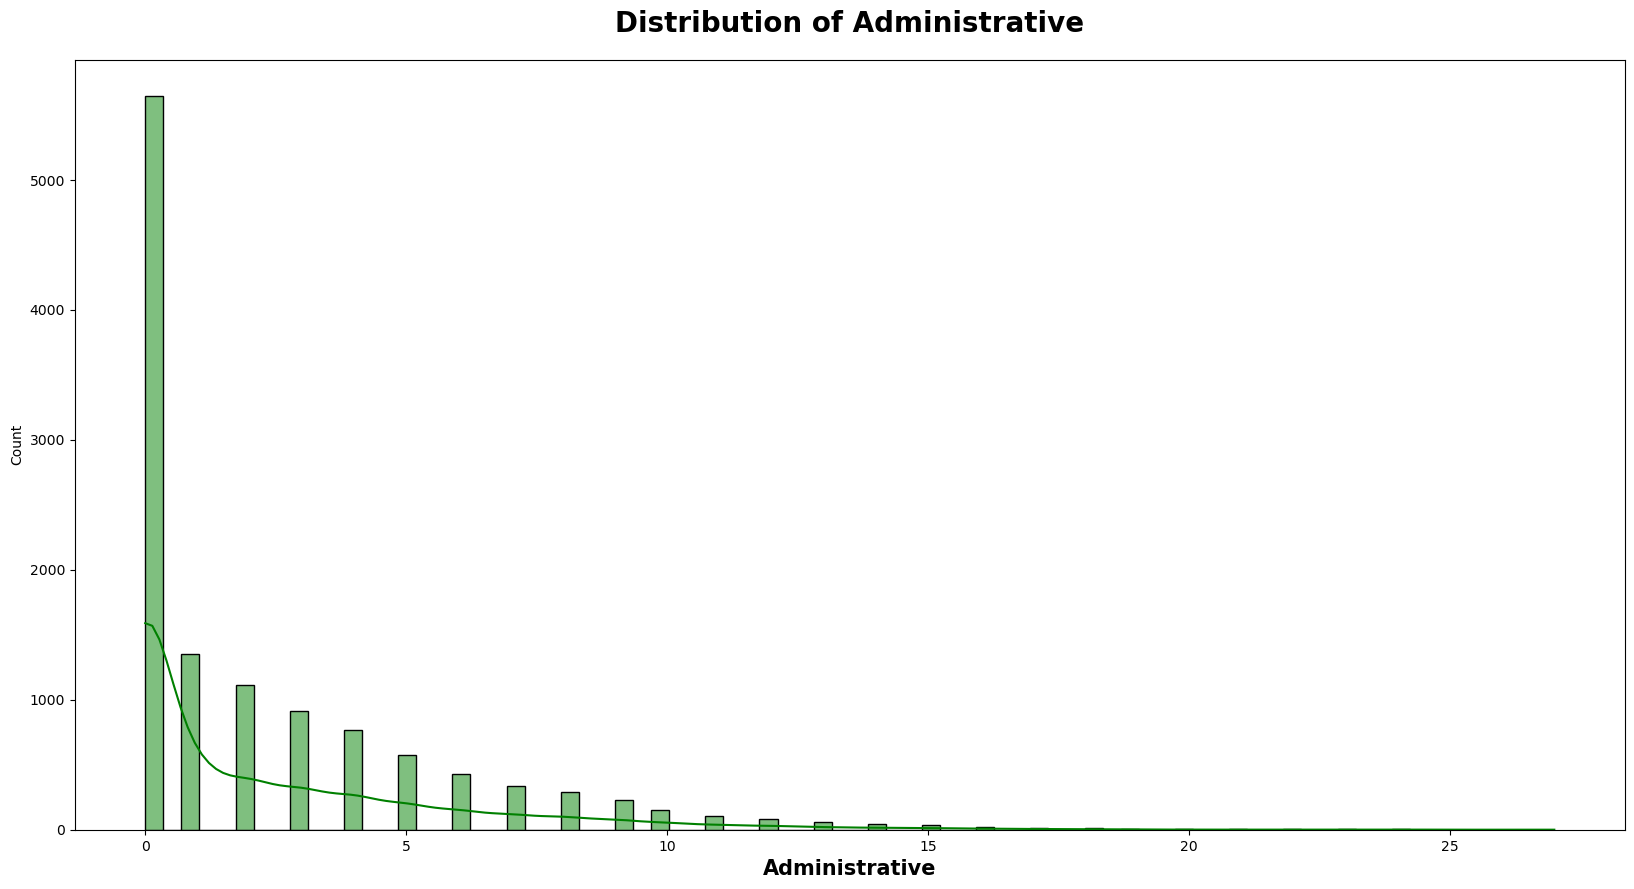

In [18]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Administrative", x=df.Administrative, color='g', kde=True)
plt.title("Distribution of Administrative", weight='bold', fontsize=20, pad=20)
plt.xlabel('Administrative', weight='bold', fontsize=15)

**"Administrative_Duration"**

<Axes: >

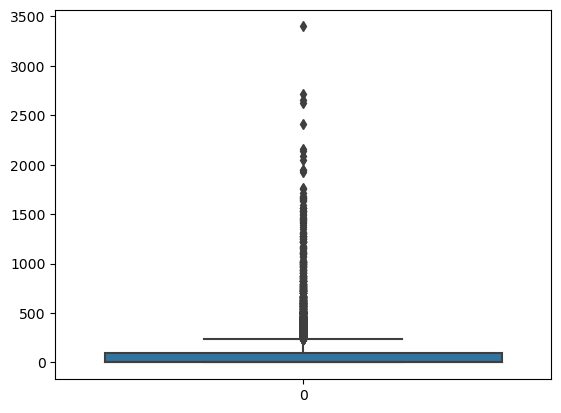

In [19]:
sns.boxplot(df['Administrative_Duration'])

C:\Users\Sai\AppData\Local\Temp\ipykernel_13140\526978813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Administrative_Duration'])


<Axes: xlabel='Administrative_Duration', ylabel='Density'>

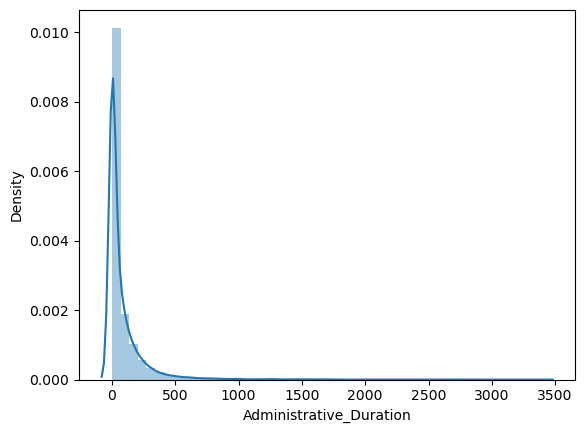

In [20]:
sns.distplot(df['Administrative_Duration'])

**"Informational"**

<Axes: >

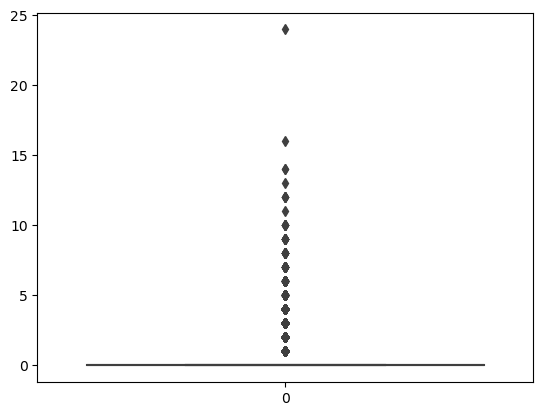

In [21]:
sns.boxplot(df['Informational'])

C:\Users\Sai\AppData\Local\Temp\ipykernel_13140\2757184359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Informational'])


<Axes: xlabel='Informational', ylabel='Density'>

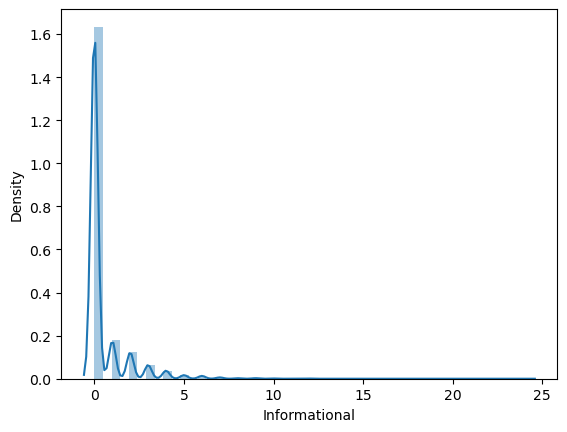

In [22]:
sns.distplot(df['Informational'])

#### "Informational_Duration" column

In [23]:
df['Informational_Duration'].value_counts()

0.00      9800
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

<Axes: xlabel='Informational_Duration', ylabel='Count'>

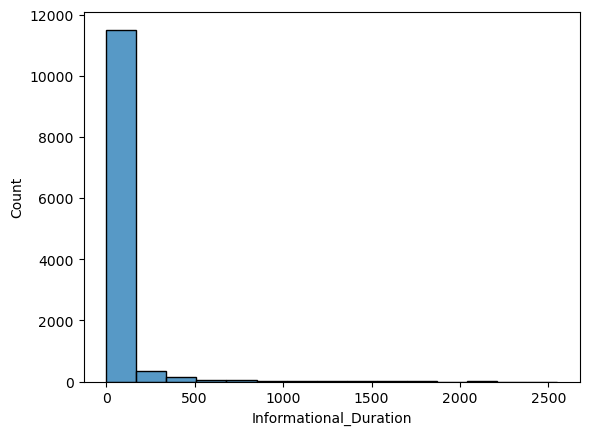

In [24]:
sns.histplot(df['Informational_Duration'])

**"ProductRelated"**

<Axes: >

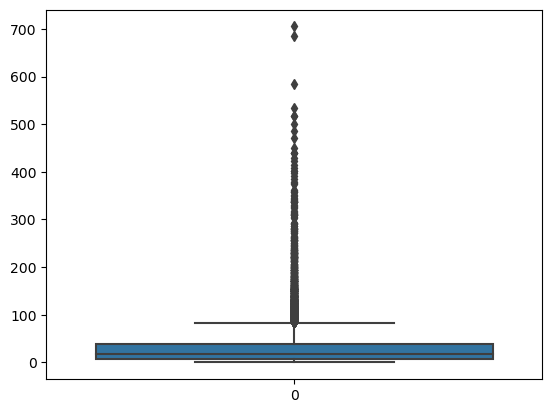

In [25]:
sns.boxplot(df['ProductRelated'])

C:\Users\Sai\AppData\Local\Temp\ipykernel_13140\457499434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ProductRelated'])


<Axes: xlabel='ProductRelated', ylabel='Density'>

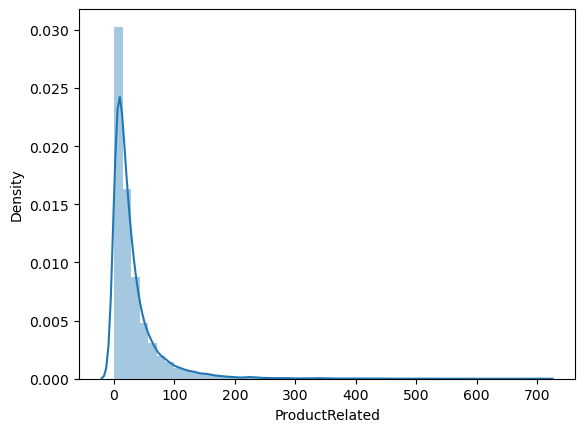

In [26]:
sns.distplot(df['ProductRelated'])

**"ProductRelated_Duration"**

<Axes: >

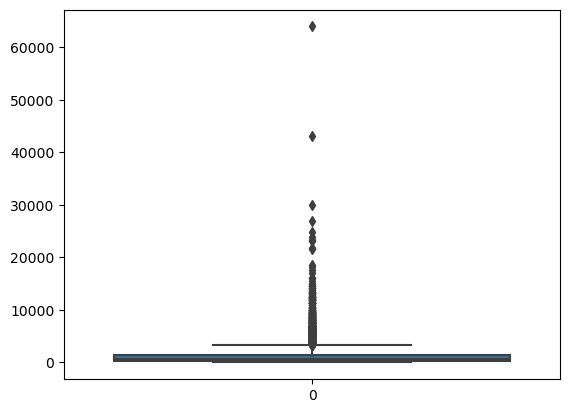

In [27]:
sns.boxplot(df['ProductRelated_Duration'])

Text(0.5, 0, 'ProductRelated_Duration')

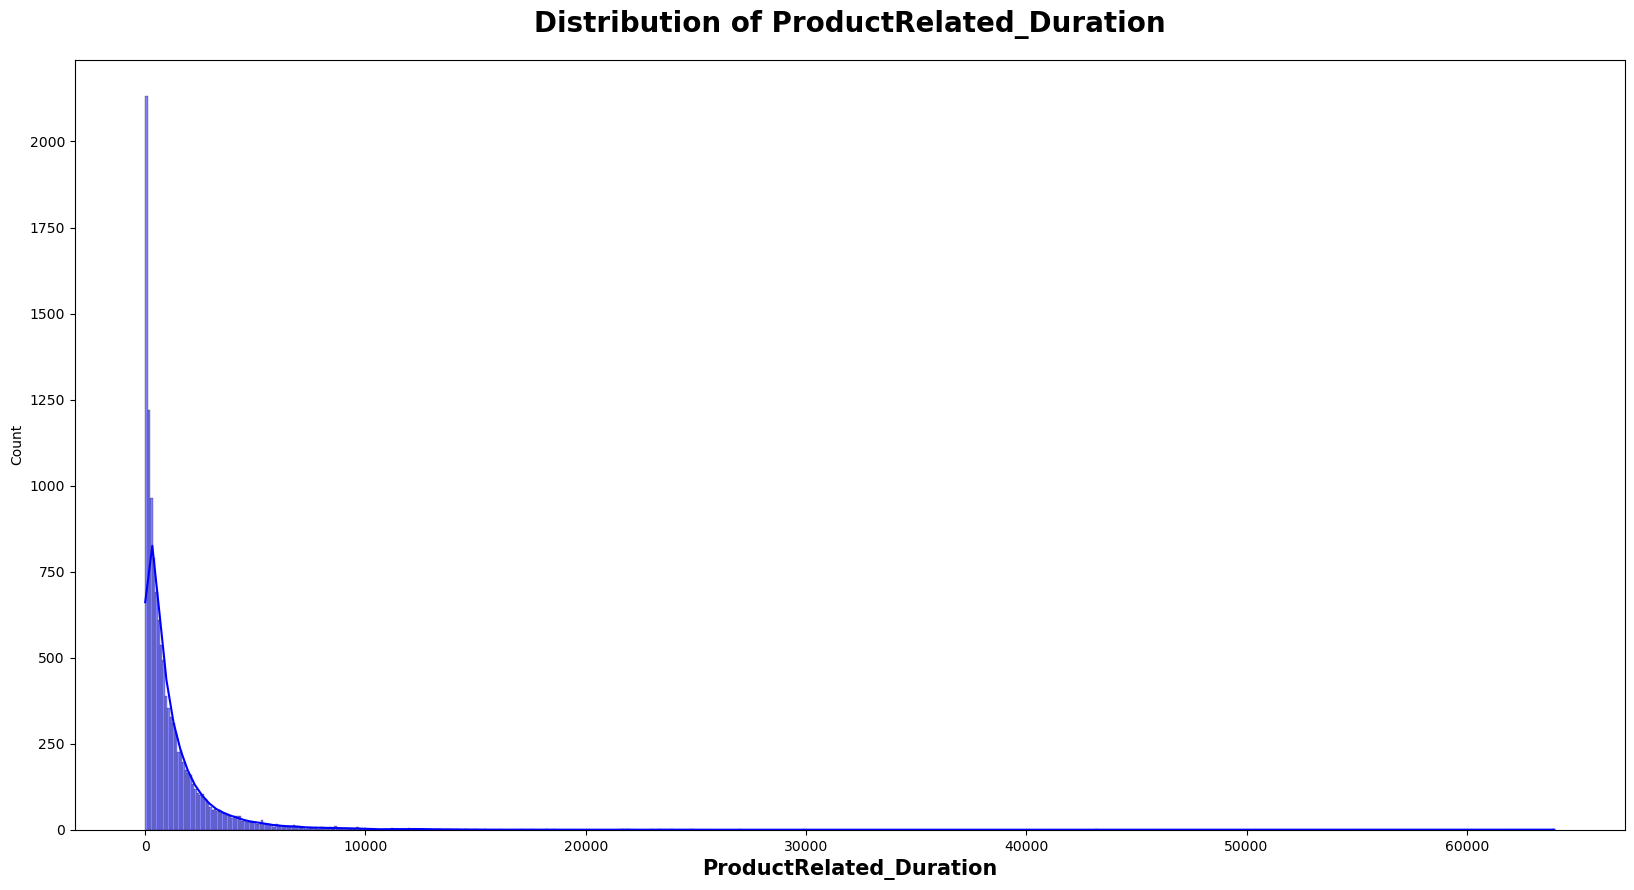

In [28]:
plt.subplots(figsize=(20,10))
sns.histplot("ProductRelated_Duration", x=df.ProductRelated_Duration, color='b', kde=True)
plt.title("Distribution of ProductRelated_Duration", weight='bold', fontsize=20, pad=20)
plt.xlabel('ProductRelated_Duration', weight='bold', fontsize=15)

**"BounceRates"**

<Axes: >

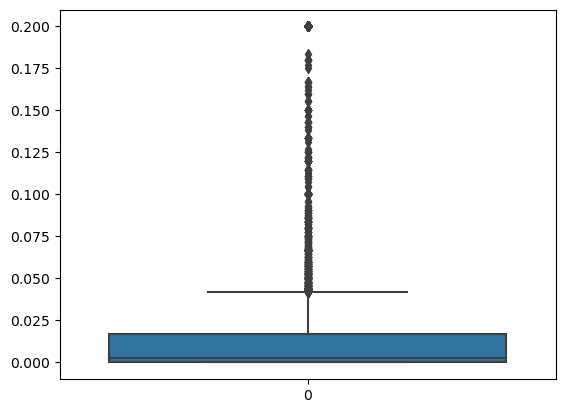

In [29]:
sns.boxplot(df['BounceRates'])

C:\Users\Sai\AppData\Local\Temp\ipykernel_13140\3540080261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BounceRates'])


<Axes: xlabel='BounceRates', ylabel='Density'>

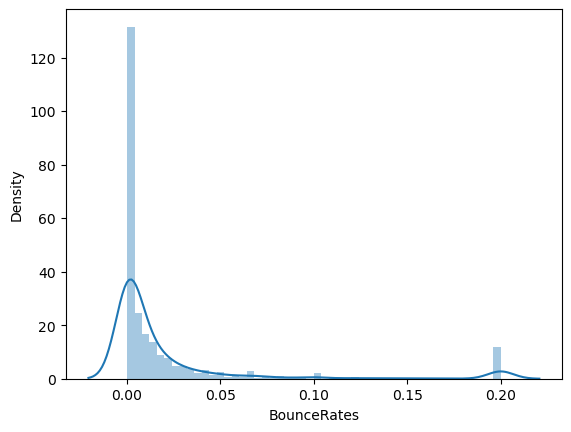

In [30]:
sns.distplot(df['BounceRates'])

**"ExitRates"**

<Axes: >

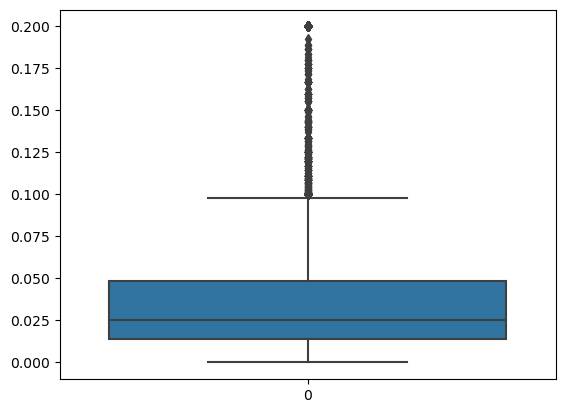

In [31]:
sns.boxplot(df['ExitRates'])

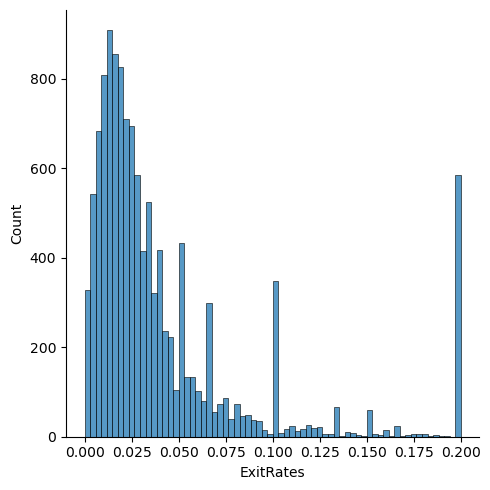

In [32]:
sns.displot(df['ExitRates'])

**"PageValues"**

<Axes: >

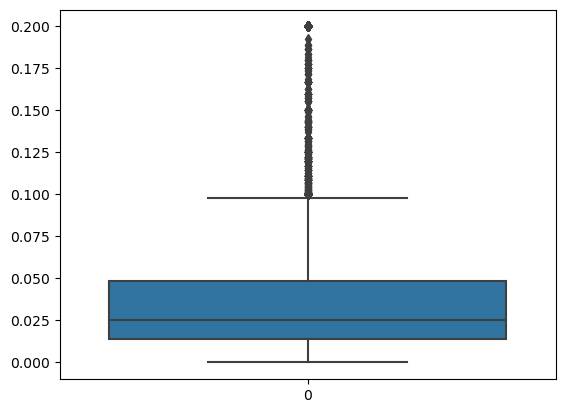

In [33]:
sns.boxplot(df['ExitRates'])

C:\Users\Sai\AppData\Local\Temp\ipykernel_13140\2684155325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PageValues'])


<Axes: xlabel='PageValues', ylabel='Density'>

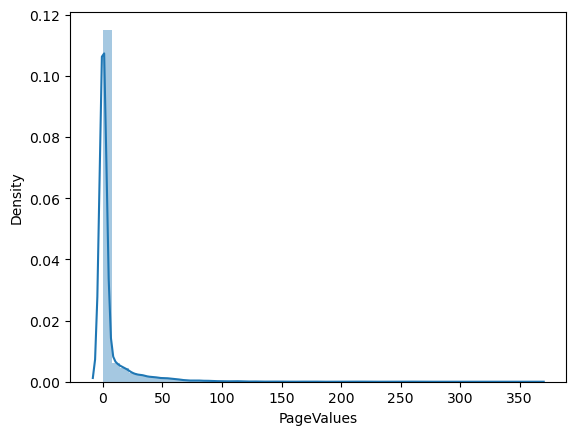

In [34]:
sns.distplot(df['PageValues'])

**"SpecialDay"**

Text(0.5, 1.0, "'SpecialDay' column count plot")

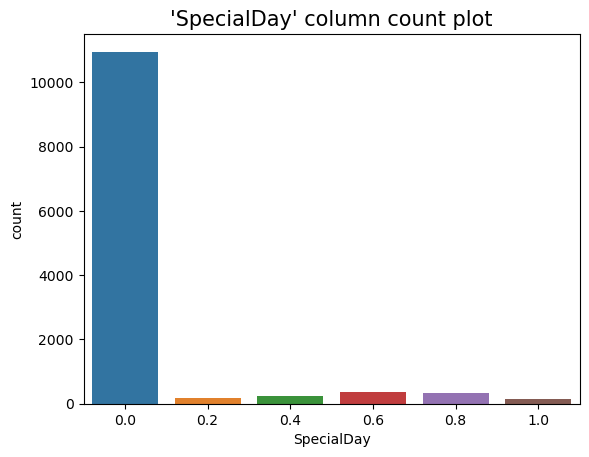

In [36]:
sns.countplot(x='SpecialDay', palette="tab10", data=df)
plt.title("'SpecialDay' column count plot", fontsize=15)

**"Month"**

Text(0.5, 1.0, 'Feature name : Month')

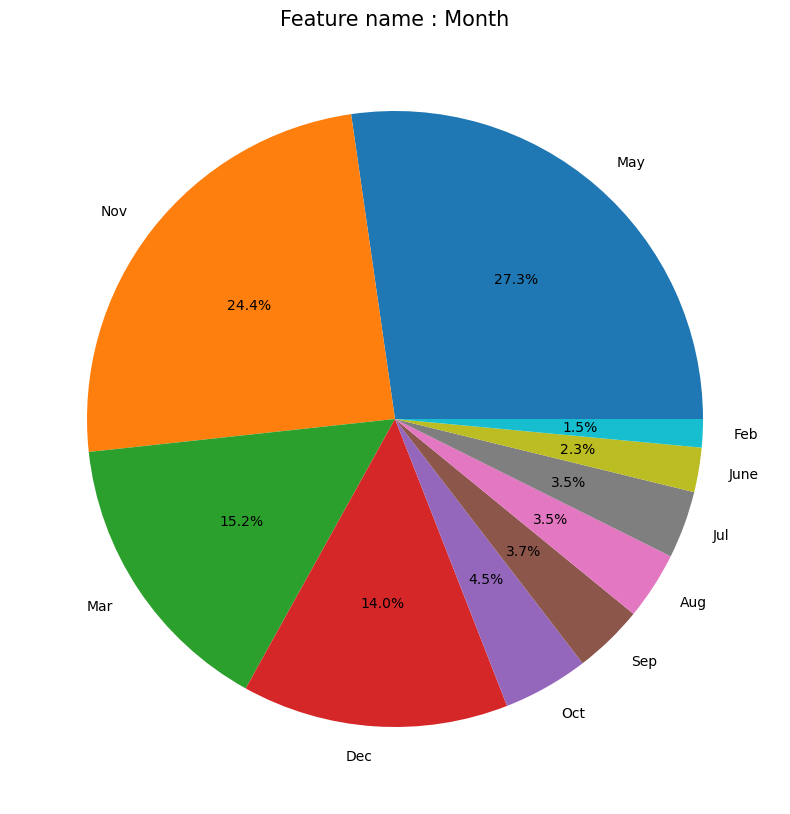

In [37]:
plt.figure(figsize=(20,10))
df.value_counts('Month').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Month", fontsize = 15)

#### Observation:
- The most sale has done on the month of November

**"OperatingSystems"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

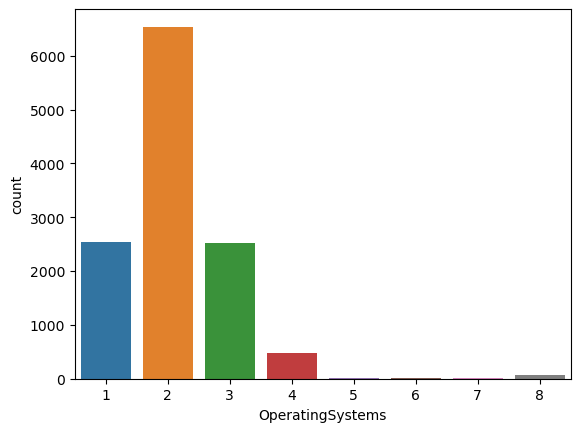

In [33]:
sns.countplot(df['OperatingSystems'])

**"Browser"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser', ylabel='count'>

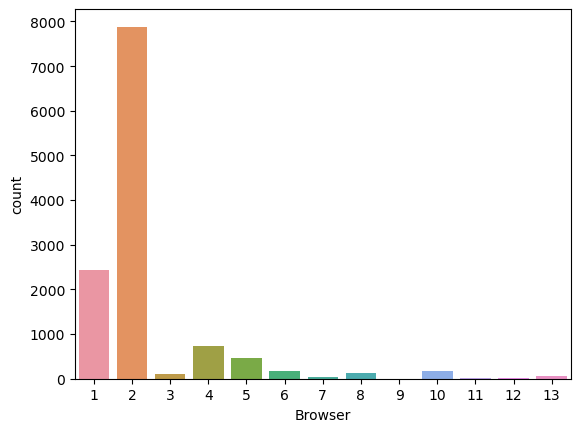

In [34]:
sns.countplot(df['Browser'])

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

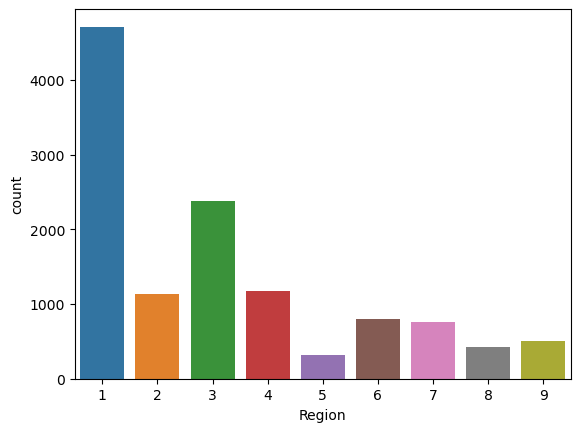

In [35]:
sns.countplot(df['Region'])

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrafficType', ylabel='count'>

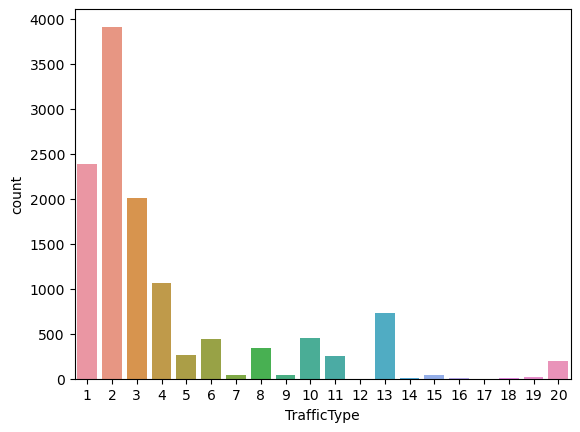

In [36]:
sns.countplot(df['TrafficType'])

**"VisitorType"**

In [37]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

#### "Weekend" column

In [38]:
df[df['Weekend']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
17,0,0.0,0,0.0,13,334.966667,0.000000,0.007692,0.000000,0.0,Feb,1,1,1,4,Returning_Visitor,True,False
20,0,0.0,0,0.0,8,136.166667,0.000000,0.008333,0.000000,1.0,Feb,2,2,5,1,Returning_Visitor,True,False
24,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,2,2,4,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12318,0,0.0,0,0.0,6,279.000000,0.000000,0.033333,0.000000,0.0,Dec,1,2,3,10,Returning_Visitor,True,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False


Text(0.5, 1.0, 'Feature name : Weekend')

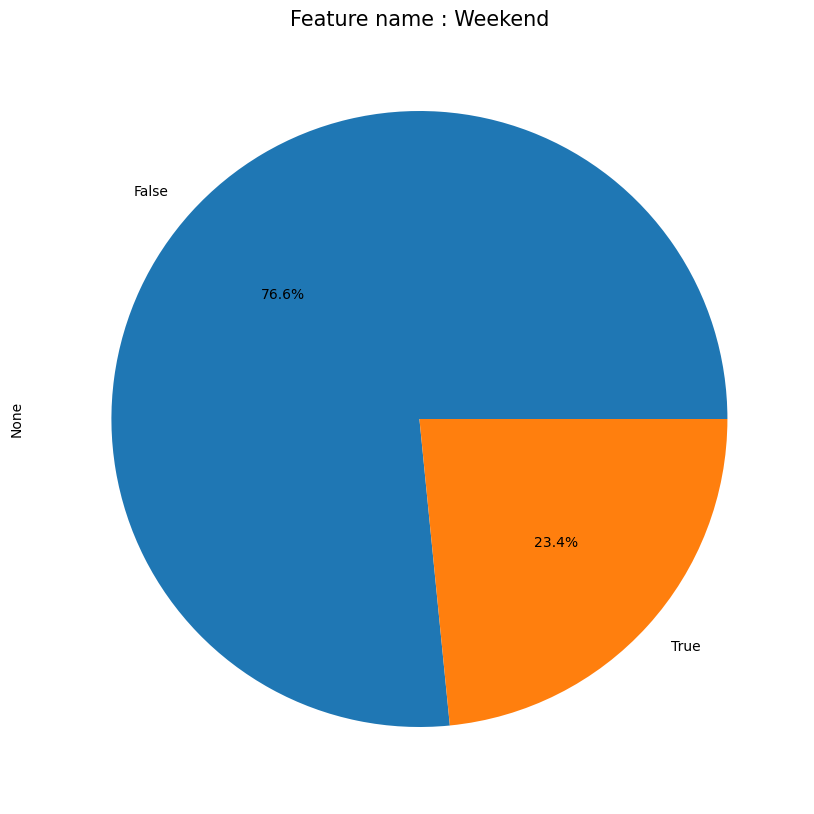

In [39]:
plt.figure(figsize=(20,10))
df.value_counts('Weekend').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Weekend", fontsize = 15)

#### Observation
- 23% of the users has done shoppings on weekends

#### 'Revenue' column

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

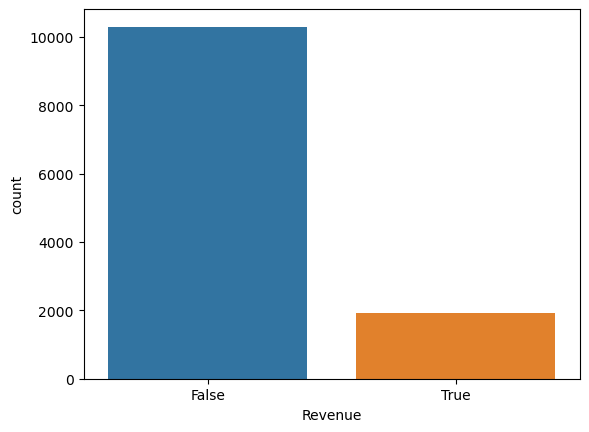

In [40]:
sns.countplot(df['Revenue'])

### Multivariate Analysis

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

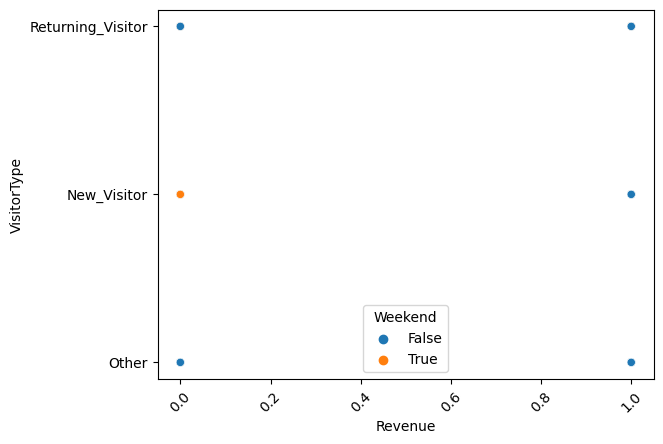

In [59]:
# Scatter plot

sns.scatterplot(data=df, x='Revenue', y='VisitorType', hue='Weekend')
plt.xticks(rotation=45)

In [47]:
# Summerizing the dataset
from skimpy import skim


skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12205  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Administrative             │   0 │      0 │     2.3 │     3.3 │   0 │       0 │       4 │     27 │   █▁▁   │  │
│ │ Administrative_Durat       │   0 │      0 │      82 │     180 │   0 │       0 │      95 │   3400 │    █    │  │
│ │ Informational              │   0 │      0 │    0.51 │     1.3 │   0 │       0 │       0 │     24 │    █    │  │
│ │ Informational_Durati       │   0 │      0 │      35 │     140 │   0 │       0 │       0 │   2500 │    █    │  │
│ │ ProductRelated             │   0 │      0 │      32 │      45 │   0 │       8 │      38 │    700 │    █    │  │
│ │ ProductRelated_Durat       │   0 │      0 │    1200 │    1900 │   0 │     190 │    1500 │  64000 │    █    │  │
│ │ BounceRates                │   0 │      0 │    0.02 │   0.045 │   0 │       0 │   0.017 │    0.2 │    █    │  │
│ │ ExitRates                  │   0 │      0 │   0.041 │   0.046 │   0 │   0.014 │   0.049 │    0.2 │ █▂▁▁ ▁  │  │
│ │ PageValues                 │   0 │      0 │     5.9 │      19 │   0 │       0 │       0 │    360 │    █    │  │
│ │ SpecialDay                 │   0 │      0 │   0.062 │     0.2 │   0 │       0 │       0 │      1 │    █    │  │
│ │ OperatingSystems           │   0 │      0 │     2.1 │    0.91 │   1 │       2 │       3 │      8 │   █▂    │  │
│ │ Browser                    │   0 │      0 │     2.4 │     1.7 │   1 │       2 │       2 │     13 │   █▁    │  │
│ │ Region                     │   0 │      0 │     3.2 │     2.4 │   1 │       1 │       4 │      9 │ █▃▂▂▁▁  │  │
│ │ TrafficType                │   0 │      0 │     4.1 │       4 │   1 │       2 │       4 │     20 │  █▁▁▁   │  │
│ └────────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Month                     │       0 │          0 │                            1 │                    12000 │  │
│ │ VisitorType               │       0 │          0 │  

In [40]:
# Pandas profiling
from pandas_profiling import ProfileReport

pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Data preprocess

In [66]:
# Drop irrelevant columns

data = df.drop(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], axis=1)

In [67]:
# Convert boolean columns to binary

data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

In [68]:
# Split the data into features and target
X = data.drop(['Revenue'], axis=1)
y = data['Revenue']

In [69]:
# Converting categorical variables to numerical using one-hot encoding

X_encoded = pd.get_dummies(X)

In [70]:
# Splitting the data into training and testing sets

X_train, X_test, y_revenue_train, y_revenue_test, y_weekend_train, y_weekend_test, informational_duration_train, informational_duration_test = train_test_split(X_encoded, y_revenue, y_weekend, informational_duration, test_size=0.2, random_state=42)

### Building model on RandomForest for Revenue prediction

In [71]:
rf_revenue = RandomForestClassifier()

In [72]:
# model training

rf_revenue.fit(X_train, y_revenue_train)

RandomForestClassifier()

In [73]:
# Making predictions on the test set

revenue_predictions = rf_revenue.predict(X_test)

In [74]:
# Calculating the accuracy of the revenue predictions

revenue_accuracy = accuracy_score(y_revenue_test, revenue_predictions)
print(round(revenue_accuracy*100, 2))

89.76


### Building model on RandomForest for Weekend prediction

In [75]:
rf_weekend = RandomForestClassifier()

In [76]:
# Train the model

rf_weekend.fit(X_train, y_weekend_train)

RandomForestClassifier()

In [77]:
# Make predictions on the test set

weekend_predictions = rf_weekend.predict(X_test)

In [78]:
# Calculate the accuracy of the weekend predictions

weekend_accuracy = accuracy_score(y_weekend_test, weekend_predictions)
print(round(weekend_accuracy, 2))

1.0


### Building model on Informational Duration Predictions

In [80]:
# Extract the Informational_Duration feature for the test set

informational_duration = X_test['Informational_Duration']

In [81]:
gbr_informational_duration = GradientBoostingRegressor()

In [82]:
# Train the model

gbr_informational_duration.fit(X_train, informational_duration_train)

GradientBoostingRegressor()

In [83]:
informational_duration_predictions = gbr_informational_duration.predict(X_test)

In [84]:
# Calculate the accuracy of the informational duration predictions

informational_duration_accuracy = r2_score(informational_duration_test, informational_duration_predictions)
print(round(informational_duration_accuracy, 2))

1.0
